##  Genbit Sample Notebook

### The notebook is intended to provide quick start for users to build on top of the GenBit API.

## Install Genbit   

In [1]:
%pip install genbit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.0/282.0 kB 9.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3

### Import utilities

In [2]:
import pprint
import genbit
from genbit.genbit_metrics import GenBitMetrics

### Specify Filename Location and Language  
(Accepted codes: EN,IT, RU, FR, DE and ES)

In [ ]:
input_file = "twitter_cleaned.csv"
language = "en"

In [4]:
language = "en"
metric = GenBitMetrics(language, context_window=30, distance_weight=0.95,
                 percentile_cutoff=80)

INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor | Package  |
------------------------
| tokenize  | combined |
| lemma     | combined |

INFO:stanza:Finished downloading models and saved to /usr/local/lib/python3.10/dist-packages/genbit/stanza_lemmatizers.


In [ ]:
contiguous = False
data = []
final = {}
text_data = open(input_file, "r", encoding="utf-8")
header = text_data.readline()
input_sentence_file = text_data.readlines()
text_data.close()
#pprint.pprint(input_sentence_file[0:10])
for i in range(len(input_sentence_file)):
  row = input_sentence_file[i]
  row = row.strip().split(",")
  try:
    line = row[1]
    line = row[1:]
  except:
    line = row[0:]
  if(contiguous):
      #line = line.strip()
      print("CONTIGUOUS", line)
      data.append(line)
  else:
      data = []
      #line = line.strip()
      data.append(line)
      metric.add_data(line, tokenized=False)


  ind_metric = metric.get_metrics(output_statistics=True, output_word_list=False)
  female_percentage = ind_metric["percentage_of_female_gender_definition_words"]
  male_percentage = ind_metric["percentage_of_male_gender_definition_words"]
  ratio = ind_metric["additional_metrics"]["avg_bias_conditional"]
  genbit_score = ind_metric['genbit_score']
  f_freq = ind_metric["statistics"]["freq_of_female_gender_definition_words"]
  m_freq = ind_metric["statistics"]["freq_of_male_gender_definition_words"]
  num_words = ind_metric["statistics"]["num_words_considered"]

  value = {"percentage_of_female_gender_definition_words": female_percentage,
          "percentage_of_male_gender_definition_words": male_percentage,
          "avg_bias_conditional": ratio,
          "genbit_score": genbit_score, "statistics": {
              "freq_of_female_gender_definition_words": f_freq,
              "freq_of_male_gender_definition_words": m_freq,
              "num_words_considered": num_words
          }}
  final[(i, str(line))] = value

if(contiguous):
    metric.add_data(data, tokenized=False)


In [ ]:
written_twitter = open("twitter_genbit_results.csv", "w")
final_str = "number,review,genbit_score,percentage_of_female_gender_definition_words,percentage_of_male_gender_definition_words,avg_bias_conditional,freq_of_female_gender_definition_words,freq_of_male_gender_definition_words,num_words_considered"
i = 0
for key, value in final.items():
  num, line = key
  line = line.split(",")
  final_line = ""
  for sent in line:
    final_line+=sent
  female_percentage = value["percentage_of_female_gender_definition_words"]
  male_percentage = value["percentage_of_male_gender_definition_words"]
  ratio = value["avg_bias_conditional"]
  genbit_score = value['genbit_score']
  f_freq = value["statistics"]["freq_of_female_gender_definition_words"]
  m_freq = value["statistics"]["freq_of_male_gender_definition_words"]
  num_words = value["statistics"]["num_words_considered"]
  final_str+= f"\n{num},{final_line},{genbit_score},{female_percentage},{male_percentage},{ratio},{f_freq},{m_freq},{num_words}"

#pprint.pprint(final_str)
written_twitter.write(final_str)
written_twitter.close()


IMDB Dataset





In [ ]:
input_file_2 = "imdb_cleaned.csv"
language = "en"

In [ ]:
metric_2 = GenBitMetrics(language, context_window=30, distance_weight=0.95,
                 percentile_cutoff=80)

In [ ]:
contiguous = False
data_2 = []
final_2 = {}
text_data_2 = open(input_file_2, "r", encoding="utf-8")
header_2 = text_data_2.readline()
input_sentence_file_2 = text_data_2.readlines()
text_data_2.close()
#pprint.pprint(input_sentence_file[0:10])
for i in range(len(input_sentence_file_2)):
  if i%20 == 0:
    print(i)
  row = input_sentence_file_2[i]
  row = row.strip().split(",")
  line = row[0:-1]
  if(contiguous):
      #line = line.strip()
      print("CONTIGUOUS", line)
      data_2.append(line)
  else:
      data_2 = []
      #line = line.strip()
      data_2.append(str(line))
      metric.add_data(str(line), tokenized=False)


  ind_metric = metric.get_metrics(output_statistics=True, output_word_list=False)
  female_percentage = ind_metric["percentage_of_female_gender_definition_words"]
  male_percentage = ind_metric["percentage_of_male_gender_definition_words"]
  ratio = ind_metric["additional_metrics"]["avg_bias_conditional"]
  genbit_score = ind_metric['genbit_score']
  f_freq = ind_metric["statistics"]["freq_of_female_gender_definition_words"]
  m_freq = ind_metric["statistics"]["freq_of_male_gender_definition_words"]
  num_words = ind_metric["statistics"]["num_words_considered"]

  value = {"percentage_of_female_gender_definition_words": female_percentage,
          "percentage_of_male_gender_definition_words": male_percentage,
          "avg_bias_conditional": ratio,
          "genbit_score": genbit_score, "statistics": {
              "freq_of_female_gender_definition_words": f_freq,
              "freq_of_male_gender_definition_words": m_freq,
              "num_words_considered": num_words
          }}
  final_2[(i, str(line))] = value

if(contiguous):
    metric.add_data(data, tokenized=False)



0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300
2320
2340
2360
2380
2400
2420
2440
2460
2480
2500
2520
2540
2560
2580
2600
2620
2640
2660
2680
2700
2720
2740
2760
2780
2800
2820
2840
2860
2880
2900
2920
2940
2960
2980
3000
3020
3040
3060
3080
3100
3120
3140
3160
3180
3200
3220
3240
3260
3280
3300
3320
3340
3360
3380
3400
3420
3440
3460
3480
3500
3520
3540
3560
3580
3600
3620
3640
3660
3680
3700
3720
3740
3760
3780
3800
3820
3840
3860
3880
3900
3920
3940
3960
3980
4000
4020
4040
4060
4080
4100
4120
4140
4160
4180
4200
4

KeyboardInterrupt: 

In [ ]:

metrics = metric.get_metrics(output_statistics=True, output_word_list=False)

In [ ]:
written_twitter_2 = open("imdb_genbit_results.csv", "w")
final_str_2 = "number,review,genbit_score,percentage_of_female_gender_definition_words,percentage_of_male_gender_definition_words,avg_bias_conditional,freq_of_female_gender_definition_words,freq_of_male_gender_definition_words,num_words_considered"
i = 0
for key, value in final_2.items():
  num, line = key
  line = line.split(",")
  final_line = ""
  for sent in line:
    final_line+=sent
  female_percentage = value["percentage_of_female_gender_definition_words"]
  male_percentage = value["percentage_of_male_gender_definition_words"]
  ratio = value["avg_bias_conditional"]
  genbit_score = value['genbit_score']
  f_freq = value["statistics"]["freq_of_female_gender_definition_words"]
  m_freq = value["statistics"]["freq_of_male_gender_definition_words"]
  num_words = value["statistics"]["num_words_considered"]
  final_str_2+= f"\n{num},{final_line},{genbit_score},{female_percentage},{male_percentage},{ratio},{f_freq},{m_freq},{num_words}"

#pprint.pprint(final_str)
written_twitter_2.write(final_str_2)
written_twitter_2.close()

In [18]:
def combine_data(genbit_filepath, bias_detect_filepath, written_filepath):
    genbit_file = open(genbit_filepath, "r")
    header_g = genbit_file.readline()
    genbit_data = genbit_file.readlines()
    genbit_file.close()

    bias_file = open(bias_detect_filepath, "r")
    header_b = bias_file.readline()
    bias_data = bias_file.readlines()
    bias_file.close()

    written_file = open(written_filepath, "w")
    final_str = "GenbitScore,BiasDetectionScore"
    len_val = min(len(genbit_data), len(bias_data))
    for i in range(len_val):
        genbit_i = genbit_data[i]
        genbit_i = genbit_i.strip().split(",")
        genbit_score = float(genbit_i[-7])
        bias_i = bias_data[i]
        bias_i = bias_i.strip().split(",")
        #print(bias_i)
        bias_label = bias_i[-2]
        bias_confidence = float(bias_i[-1])
        bias_score = bias_confidence
        if bias_label == " Non-biased":
          bias_score = bias_confidence * (-1)

        final_str+=f"\n{genbit_score},{bias_score}"

    written_file.write(final_str)



In [ ]:
combine_data("twitter_genbit_results.csv", "twitter_bias_results.csv", "twitter_genbit_bias_combine.csv")

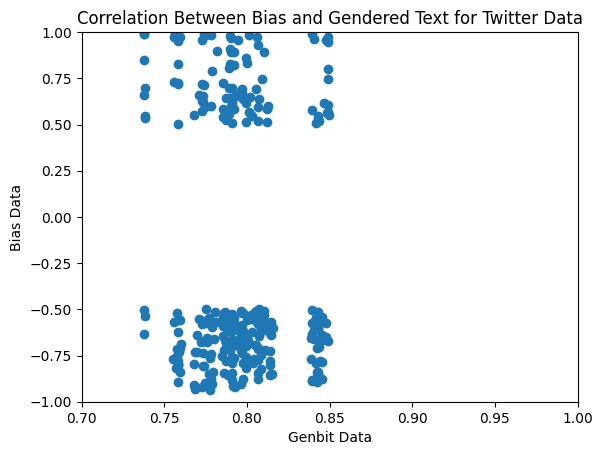

In [ ]:
import matplotlib.pyplot as plt
genbit_x = []
bias_y = []
combined = open("/content/twitter_genbit_bias_combine.csv", "r")
header = combined.readline()
data = combined.readlines()
i = 0
for line in data:
  if i%50 == 0:
    line = line.strip().split(",")
    genbit_i = float(line[0])
    bias_i = float(line[1])

    genbit_x.append(genbit_i)
    bias_y.append(bias_i)

  i+=1


# plotting the points
plt.scatter(genbit_x, bias_y)
plt.ylim(-1,1)
plt.xlim(0.7,1)

# naming the x axis
plt.xlabel('Genbit Data')
# naming the y axis
plt.ylabel('Bias Data')

# giving a title to my graph
plt.title('Correlation Between Bias and Gendered Text for Twitter Data')

# function to show the plot
plt.show()

In [19]:
import numpy as np
def combine_data_2(genbit_filepath, bias_detect_filepath, written_filepath):
    genbit_file = open(genbit_filepath, "r")
    header_g = genbit_file.readline()
    genbit_data = genbit_file.readlines()
    genbit_file.close()

    bias_file = open(bias_detect_filepath, "r")
    header_b = bias_file.readline()
    bias_data = bias_file.readlines()
    bias_file.close()

    written_file = open(written_filepath, "w")
    final_str = "GenbitScore,BiasDetectionScore"
    len_val = min(len(genbit_data), len(bias_data))
    for i in range(len_val):
        genbit_i = genbit_data[i]
        genbit_i = genbit_i.strip().split(",")
        genbit_score = float(genbit_i[-7])
        f_score = float(genbit_i[-6])
        m_score = float(genbit_i[-5])
        f_norm = f_score / (f_score+m_score)
        m_norm = m_score/ (f_score+m_score)
        ratio = np.log(m_norm/f_norm)
        bias_i = bias_data[i]
        bias_i = bias_i.strip().split(",")
        bias_label = bias_i[-2]
        bias_confidence = float(bias_i[-1])
        bias_score = bias_confidence
        if bias_label == " Non-biased":
          #print(bias_confidence)
          bias_score = bias_confidence * (-1)

        final_str+=f"\n{ratio},{bias_score}"

    written_file.write(final_str)



In [ ]:
combine_data_2("twitter_genbit_results.csv", "twitter_bias_results.csv", "twitter_genbit_bias_combine_alternate.csv")

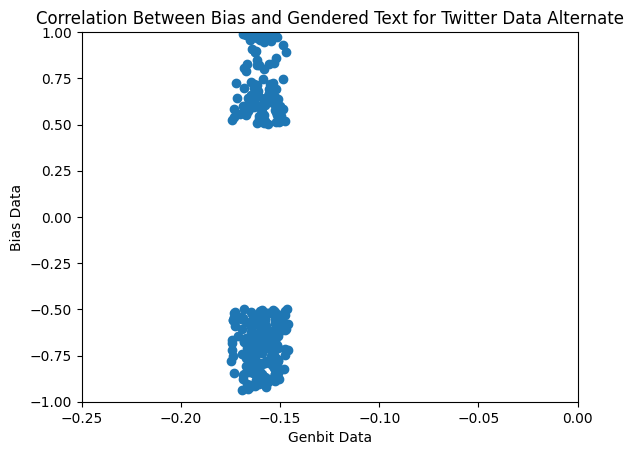

In [ ]:
genbit_x_2 = []
bias_y_2 = []
combined_2 = open("/content/twitter_genbit_bias_combine_alternate.csv", "r")
header = combined_2.readline()
data = combined_2.readlines()
i = 0
for line in data:
  if i%50 == 0:
    line = line.strip().split(",")
    genbit_i = float(line[0])
    bias_i = float(line[1])
    genbit_x_2.append(genbit_i)
    bias_y_2.append(bias_i)

  i+=1


# plotting the points
plt.scatter(genbit_x_2, bias_y_2)
plt.ylim(-1,1)
plt.xlim(-0.25,0)

# naming the x axis
plt.xlabel('Genbit Data')
# naming the y axis
plt.ylabel('Bias Data')

# giving a title to my graph
plt.title('Correlation Between Bias and Gendered Text for Twitter Data Alternate')

# function to show the plot
plt.show()

In [ ]:
combine_data("imdb_genbit_results.csv", "imdb_bias_results.csv", "imdb_genbit_bias_combine.csv")

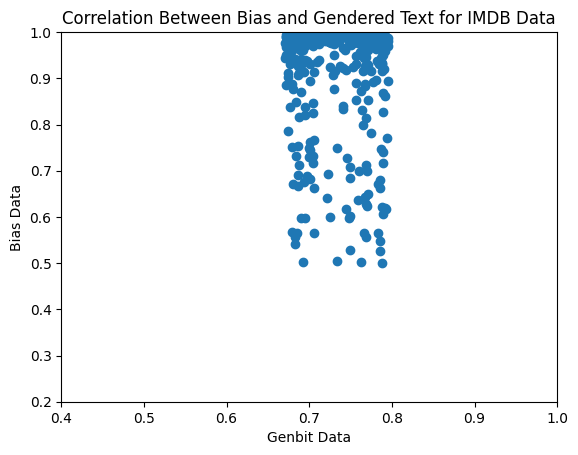

In [ ]:
genbit_x_2 = []
bias_y_2 = []
combined_2 = open("/content/imdb_genbit_bias_combine.csv", "r")
header = combined_2.readline()
data = combined_2.readlines()
i = 0
for line in data:
  if i%10 == 0:
    line = line.strip().split(",")
    genbit_i = float(line[0])
    bias_i = float(line[1])

    genbit_x_2.append(genbit_i)
    bias_y_2.append(bias_i)

  i+=1


# plotting the points
plt.scatter(genbit_x_2, bias_y_2)
plt.ylim(0.2,1)
plt.xlim(0.4,1)

# naming the x axis
plt.xlabel('Genbit Data')
# naming the y axis
plt.ylabel('Bias Data')

# giving a title to my graph
plt.title('Correlation Between Bias and Gendered Text for IMDB Data')

# function to show the plot
plt.show()

In [ ]:
combine_data_2("imdb_genbit_results.csv", "imdb_bias_results.csv", "imdb_genbit_bias_combine_alternate.csv")

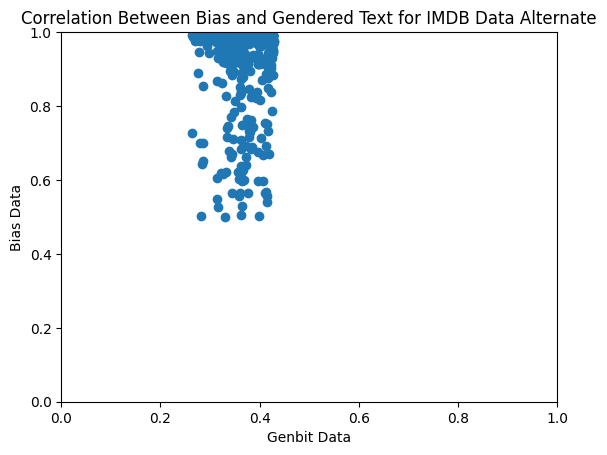

In [ ]:
genbit_x_2 = []
bias_y_2 = []
combined_2 = open("/content/imdb_genbit_bias_combine_alternate.csv", "r")
header = combined_2.readline()
data = combined_2.readlines()
i = 0
for line in data:
  if i%10 == 0:
    line = line.strip().split(",")
    genbit_i = float(line[0])
    bias_i = float(line[1])
    genbit_x_2.append(genbit_i)
    bias_y_2.append(bias_i)

  i+=1


# plotting the points
plt.scatter(genbit_x_2, bias_y_2)
plt.ylim(0,1)
plt.xlim(0,1)

# naming the x axis
plt.xlabel('Genbit Data')
# naming the y axis
plt.ylabel('Bias Data')

# giving a title to my graph
plt.title('Correlation Between Bias and Gendered Text for IMDB Data Alternate')

# function to show the plot
plt.show()

In [13]:
def get_data(file_name):
  contiguous = False
  data = []
  final_t_pos = {}
  text_data = open(file_name, "r", encoding="utf-8")
  header = text_data.readline()
  input_sentence_file = text_data.readlines()
  text_data.close()
  #pprint.pprint(input_sentence_file[0:10])
  for i in range(len(input_sentence_file)):
    row = input_sentence_file[i]
    row = row.strip().split(",")
    line = row[0:]
    if(contiguous):
        #line = line.strip()
        print("CONTIGUOUS", line)
        data.append(line)
    else:
        data = []
        #line = line.strip()
        data.append(line)
        metric.add_data(line, tokenized=False)


    ind_metric = metric.get_metrics(output_statistics=True, output_word_list=False)
    female_percentage = ind_metric["percentage_of_female_gender_definition_words"]
    male_percentage = ind_metric["percentage_of_male_gender_definition_words"]
    ratio = ind_metric["additional_metrics"]["avg_bias_conditional"]
    genbit_score = ind_metric['genbit_score']
    f_freq = ind_metric["statistics"]["freq_of_female_gender_definition_words"]
    m_freq = ind_metric["statistics"]["freq_of_male_gender_definition_words"]
    num_words = ind_metric["statistics"]["num_words_considered"]

    value = {"percentage_of_female_gender_definition_words": female_percentage,
            "percentage_of_male_gender_definition_words": male_percentage,
            "avg_bias_conditional": ratio,
            "genbit_score": genbit_score, "statistics": {
                "freq_of_female_gender_definition_words": f_freq,
                "freq_of_male_gender_definition_words": m_freq,
                "num_words_considered": num_words
            }}
    final_t_pos[(i, str(line))] = value

  if(contiguous):
      metric.add_data(data, tokenized=False)
  return final_t_pos


In [8]:
def write_data(data_dict, written_file):
  written_twitter = open(written_file, "w")
  final_str = "number,review,genbit_score,percentage_of_female_gender_definition_words,percentage_of_male_gender_definition_words,avg_bias_conditional,freq_of_female_gender_definition_words,freq_of_male_gender_definition_words,num_words_considered"
  i = 0
  for key, value in data_dict.items():
    num, line = key
    line = line.split(",")
    final_line = ""
    for sent in line:
      final_line+=sent
    female_percentage = value["percentage_of_female_gender_definition_words"]
    male_percentage = value["percentage_of_male_gender_definition_words"]
    ratio = value["avg_bias_conditional"]
    genbit_score = value['genbit_score']
    f_freq = value["statistics"]["freq_of_female_gender_definition_words"]
    m_freq = value["statistics"]["freq_of_male_gender_definition_words"]
    num_words = value["statistics"]["num_words_considered"]
    final_str+= f"\n{num},{final_line},{genbit_score},{female_percentage},{male_percentage},{ratio},{f_freq},{m_freq},{num_words}"

  #pprint.pprint(final_str)
  written_twitter.write(final_str)
  written_twitter.close()

In [9]:
data_dict = get_data("twitterpositive.tsv")
write_data(data_dict, "twitter_pos_genbit_results.csv")

In [15]:
data_dict = get_data("/content/twitternegative.tsv")
write_data(data_dict, "twitter_neg_genbit_results.csv")

In [20]:
combine_data("twitter_pos_genbit_results.csv", "twitter_pos_hf_results.csv", "twitter_genbit_bias_combine_pos.csv")
combine_data_2("twitter_pos_genbit_results.csv", "twitter_pos_hf_results.csv", "twitter_genbit_bias_combine_pos_alternate.csv")

In [26]:
import matplotlib.pyplot as plt
def plot_data(file_path, sentiment):
  genbit_x = []
  bias_y = []
  combined = open(file_path, "r")
  header = combined.readline()
  data = combined.readlines()
  i = 0
  for line in data:
    if i%10 == 0:
      line = line.strip().split(",")
      genbit_i = float(line[0])
      bias_i = float(line[1])

      genbit_x.append(genbit_i)
      bias_y.append(bias_i)

    i+=1


  # plotting the points
  plt.scatter(genbit_x, bias_y)
  plt.ylim(-1,1)
  plt.xlim(-1,1)

  # naming the x axis
  plt.xlabel('Genbit Data')
  # naming the y axis
  plt.ylabel('Bias Data')

  # giving a title to my graph
  plt.title("Correlation Between Bias and Gendered Text for " + sentiment + " Twitter Data")

  # function to show the plot
  plt.show()

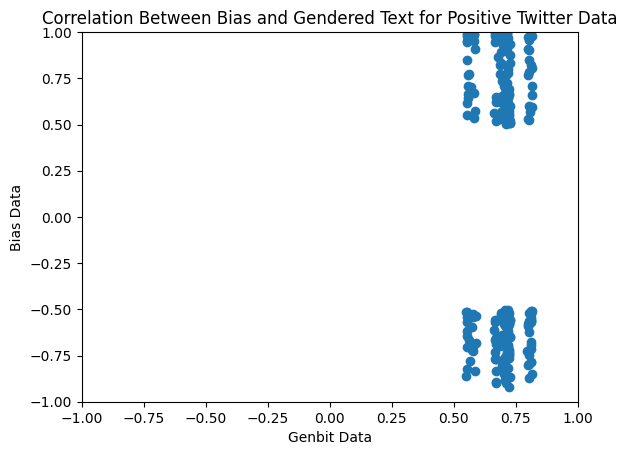

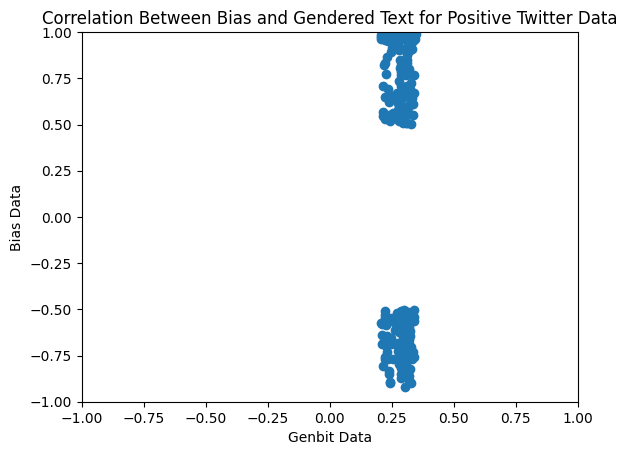

In [27]:
plot_data("twitter_genbit_bias_combine_pos.csv", "Positive")
plot_data("twitter_genbit_bias_combine_pos_alternate.csv", "Positive")

In [11]:
def get_data_imdb(file_name):
  contiguous = False
  data = []
  final_t_pos = {}
  text_data = open("twitterpositive.tsv", "r", encoding="utf-8")
  header = text_data.readline()
  input_sentence_file = text_data.readlines()
  text_data.close()
  #pprint.pprint(input_sentence_file[0:10])
  for i in range(len(input_sentence_file)):
    if i > 1000:
      break
    row = input_sentence_file[i]
    row = row.strip().split(",")
    line = row[0:]
    if(contiguous):
        #line = line.strip()
        print("CONTIGUOUS", line)
        data.append(line)
    else:
        data = []
        #line = line.strip()
        data.append(line)
        metric.add_data(line, tokenized=False)


    ind_metric = metric.get_metrics(output_statistics=True, output_word_list=False)
    female_percentage = ind_metric["percentage_of_female_gender_definition_words"]
    male_percentage = ind_metric["percentage_of_male_gender_definition_words"]
    ratio = ind_metric["additional_metrics"]["avg_bias_conditional"]
    genbit_score = ind_metric['genbit_score']
    f_freq = ind_metric["statistics"]["freq_of_female_gender_definition_words"]
    m_freq = ind_metric["statistics"]["freq_of_male_gender_definition_words"]
    num_words = ind_metric["statistics"]["num_words_considered"]

    value = {"percentage_of_female_gender_definition_words": female_percentage,
            "percentage_of_male_gender_definition_words": male_percentage,
            "avg_bias_conditional": ratio,
            "genbit_score": genbit_score, "statistics": {
                "freq_of_female_gender_definition_words": f_freq,
                "freq_of_male_gender_definition_words": m_freq,
                "num_words_considered": num_words
            }}
    final_t_pos[(i, str(line))] = value

  if(contiguous):
      metric.add_data(data, tokenized=False)
  return final_t_pos

In [12]:
data_dict = get_data_imdb("imdbpositive.tsv")
write_data(data_dict, "imdb_pos_genbit_results.csv")

In [ ]:
pprint.pprint(metrics)

{'additional_metrics': {'avg_bias_conditional': -0.1466859364689251,
                        'avg_bias_conditional_absolute': 0.5487641084908348,
                        'avg_bias_ratio': -0.13224525231413145,
                        'avg_bias_ratio_absolute': 0.5423481803629997,
                        'avg_non_binary_bias_conditional': -0.013991301959264839,
                        'avg_non_binary_bias_conditional_absolute': 0.6682867743966338,
                        'avg_non_binary_bias_ratio': 0.012648525939946177,
                        'avg_non_binary_bias_ratio_absolute': 0.6662340670854482,
                        'avg_trans_cis_bias_conditional': -0.6024004452092936,
                        'avg_trans_cis_bias_conditional_absolute': 0.6917600367040975,
                        'avg_trans_cis_bias_ratio': -0.7680046632780295,
                        'avg_trans_cis_bias_ratio_absolute': 0.7680046632780295,
                        'std_dev_bias_conditional': 0,
                 

### Print the results
The results using the test file should show a heavy non-binary bias as many terms in the sample file are gender 'neutral' or explicitly non-binary. You will also observe that in the case of binary bias, there is a slight male-leaning bias due to the more frequently occure male gender definition words throughout the samples in the data.

###  ----- END --------